In [171]:
import sys 
sys.path.append('/Users/willknott/Desktop/DIS/coursework/pds/wdk24/src')

%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [172]:
from generation import generate_from_total_pdf
from distributions import total_cdf
from hypothesis_test import signal_background_test

In [173]:
# True parameter values
true_params, alpha, beta = {'f': 0.1, 'lam': 0.5, 'mu': 5.28, 'sigma': 0.018}, 5, 5.6
random_shifts = {
    'f': np.random.uniform(-0.09, 0.5), 
    'lam': np.random.uniform(-0.3, 1), 
    'mu': np.random.uniform(-0.25, 0.3), 
    'sigma': np.random.uniform(-0.01, 0.03)
}
starting_params = {}
for param in true_params:
    starting_params[param] = true_params[param] + random_shifts[param]
    starting_params[param] = float(f'{starting_params[param]:.4}')

In [174]:
n_datapoints = 100
n_init = 100
N = np.logspace(1, 6, num=n_datapoints).astype(int)
N = np.linspace(48000, 67000, n_datapoints).astype(int)
ns = np.array([n_init for _ in range(n_datapoints)])

all_data = [np.array([generate_from_total_pdf(N_events) for _ in range(n_init)]) for N_events in N]


In [175]:
def error_on_p(p, n):
    return np.sqrt((p*(1-p))/n)

### Hypothesis Testing

In [176]:
P = []
P_err = []
validities = []
for i, group_i in enumerate(all_data):
    n_i = ns[i]

    r_discoveries = 0
    for dataset in group_i:

        discovery, _, _ = signal_background_test(dataset=dataset, cdf=total_cdf, starting_params=starting_params)

        if discovery=='h0 invalid' or discovery=='h1 invalid':
            n_i -= 1

        if discovery==True:
            r_discoveries += 1

    p = r_discoveries/n_i
    P.append(p)
    P_err.append(error_on_p(p, n_i))

#---------------
#---------------
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 8.872 (chi2/ndof = 0.0)    │              Nfcn = 367              │
│ EDM = 2.15e+04 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│NOT pos. def.│   FORCED   │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────

In [177]:
# successes = []
# for N_i in Ns:
#     n_discoveries = 0
#     for _ in range(n_init):
#         dataset = generate_from_total_pdf(N_i)

#         discovery, _, _ = signal_background_test(dataset=dataset, cdf=total_cdf, starting_params=starting_params)

#         if discovery:
#             n_discoveries += 1
#     successes.append(n_discoveries)

# dict(zip(Ns, successes))

# Finding `N_90`

In [178]:
print(N)
print(P)
print(P_err)
N, P, P_err = np.array(N), np.array(P), np.array(P_err)

[48000 48191 48383 48575 48767 48959 49151 49343 49535 49727 49919 50111
 50303 50494 50686 50878 51070 51262 51454 51646 51838 52030 52222 52414
 52606 52797 52989 53181 53373 53565 53757 53949 54141 54333 54525 54717
 54909 55101 55292 55484 55676 55868 56060 56252 56444 56636 56828 57020
 57212 57404 57595 57787 57979 58171 58363 58555 58747 58939 59131 59323
 59515 59707 59898 60090 60282 60474 60666 60858 61050 61242 61434 61626
 61818 62010 62202 62393 62585 62777 62969 63161 63353 63545 63737 63929
 64121 64313 64505 64696 64888 65080 65272 65464 65656 65848 66040 66232
 66424 66616 66808 67000]
[0.02, 0.01, 0.01, 0.0, 0.07, 0.03, 0.0, 0.04, 0.03, 0.05, 0.05, 0.05, 0.13, 0.07, 0.1, 0.08, 0.07, 0.07, 0.1, 0.23, 0.1414141414141414, 0.12, 0.1, 0.1, 0.16, 0.2, 0.17, 0.21, 0.23232323232323232, 0.27, 0.25, 0.31, 0.34, 0.37, 0.39, 0.31, 0.36, 0.34, 0.36, 0.34, 0.34, 0.47, 0.46, 0.57, 0.53, 0.51, 0.55, 0.6, 0.64, 0.65, 0.56, 0.73, 0.67, 0.72, 0.61, 0.65, 0.72, 0.73, 0.73, 0.79, 0.65, 0.

In [182]:
# import pickle 

# data_to_save = {
#     'N': N,
#     'P': P,
#     'P_err': P_err
# }

# # Save the data to a pickle file
# with open('PN_data.pkl', 'wb') as file:
#     pickle.dump(data_to_save, file)

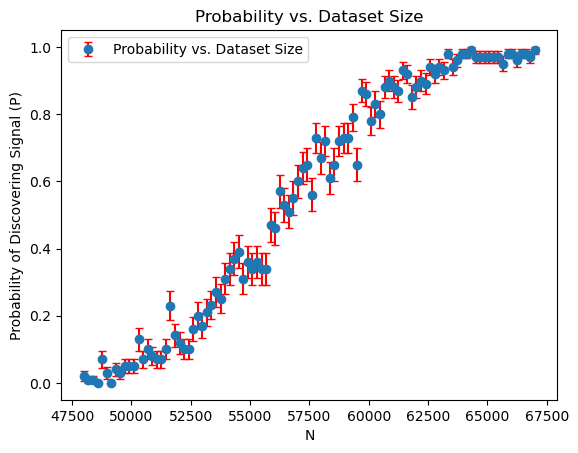

In [183]:
reduced_N = N*1e-5

fig, ax = plt.subplots()
ax.errorbar(N, P, yerr=P_err, fmt='o', ecolor='red', capsize=3, label='Probability vs. Dataset Size')
ax.set_xlabel('N')
ax.set_ylabel('Probability of Discovering Signal (P)')
ax.set_title('Probability vs. Dataset Size')
ax.legend()

{'a': '(-4.9e-13, 7.06e-15)',
 'b': '(8.35e-08, 1.15e-09)',
 'c': '(-0.00465, 6.19e-05)',
 'd': '(85.2, 1.1)'}

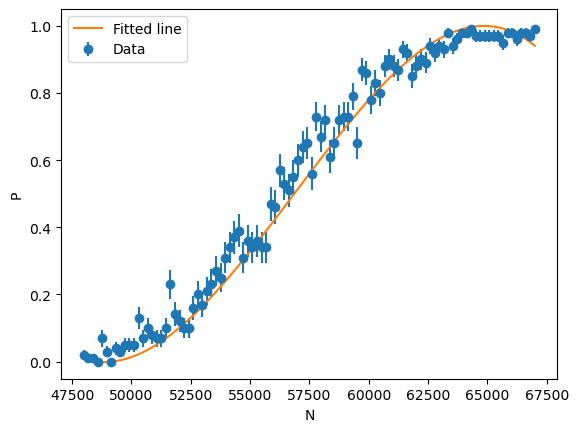

In [187]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def third_degree(x, a, b, c, d):
    return a*(x**3) + b*(x**2) + c*x + d 
def fourth_degree(x, a, b, c, d, e):
    return a*(x**4) + b*(x**3) + c*(x**2) + d*x + e

# Replace 0 uncertainties with 0.00001 so as to 
# not produce errors in the least squares estimation
P_err[P_err == 0.0] = 0.00001

# ------------------
# should maybe use starting values
# ------------------
popt, pcov = curve_fit(third_degree, N, P, sigma=P_err, absolute_sigma=True)

fig, ax = plt.subplots()

# Plotting
ax.errorbar(N, P, yerr=P_err, fmt='o', label='Data')
ax.plot(N, third_degree(N, *popt), label='Fitted line')
ax.set_xlabel('N')
ax.set_ylabel('P')
ax.legend()

a, b, c, d = popt
a_err, b_err, c_err, d_err = np.sqrt(np.diag(pcov))

parameter_estimates = {
    'a': f'({a:.3}, {a_err:.3})',
    'b': f'({b:.3}, {b_err:.3})',
    'c': f'({c:.3}, {c_err:.3})',
    'd': f'({d:.3}, {d_err:.3})'
}

parameter_estimates